# Part II - (Ford GoBike System Data)
## by (Ibe Nchedochukwu)


## Investigation Overview

> I found out that most young people are interested in the bike sharing scheme given the number of young people in the dataset. > I also found out that majority of those that were subscribers used the bike share for all trips so it needs to be put into consideration for the next bike scheme that might happen in future.


## Dataset Overview

> This dataset includes information about individual rides made in a bike sharing system covering the greater San Francisco Bay Area. There are 183,412 data entries in the dataset with 16 columns(duration sec, start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user type, member birth year, member gender, and bike share for all trip.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df= pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(5)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
df_clean= df.copy()

In [4]:
mean= df_clean['member_birth_year'].mean()
df_clean['member_birth_year'].fillna(mean, inplace= True)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

In [5]:
df_clean.dropna(axis= 0, inplace = True)

In [6]:
df_clean['age'] = 2022 - df_clean.member_birth_year

In [7]:
df_clean['duration_min']= df_clean['duration_sec']/60
df_clean['duration_min']= df_clean['duration_min'].astype(int)

## Is there a Relationship between Genders and Usertype?

Most Males were subscribers of the bike sharing Scheme.

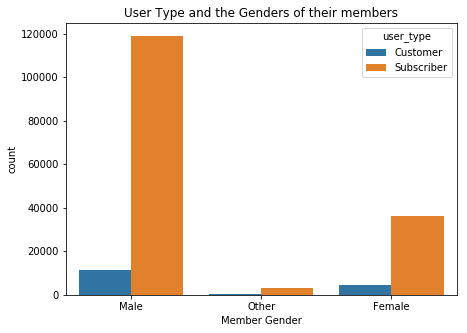

In [8]:
plt.figure(figsize= [7,5])
sb.countplot(data= df_clean, x= 'member_gender', hue= 'user_type')
plt.xlabel('Member Gender')
plt.title('User Type and the Genders of their members');

## Does the Age and User type affect the duration of their trips?

Majority of the people aged 20 to 50 were subscribers and customers, they also used the bike for longer duration in minutes than people of older ages

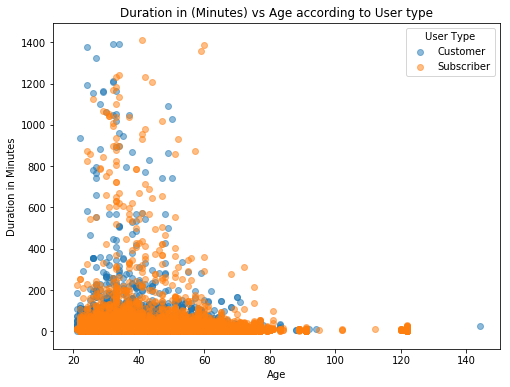

In [9]:
plt.figure(figsize = [8,6]);
user_type_markers = [['Customer', '^'],
               ['Subscriber', 'x']]

for cat, marker in user_type_markers:
    df_cat = df_clean[df_clean['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'age', y = 'duration_min', alpha=10/20);
plt.legend(['Customer','Subscriber'], title='User Type');
plt.xlabel('Age');
plt.ylabel('Duration in Minutes');
plt.title('Duration in (Minutes) vs Age according to User type');

## Does the User type and Age have an effect on whether they used the bike for Alll Trips?

Most people who were aged 0-35 that were subscribers used their bikes for all trips, also people that did not use their bikes for all trips were both cutomers and subscribers.

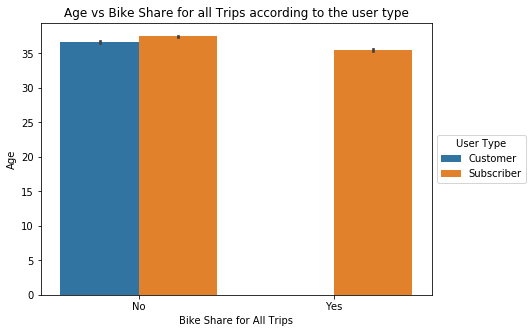

In [10]:
plt.figure(figsize= [7,5])
ax = sb.barplot(data = df_clean, x = 'bike_share_for_all_trip', y = 'age', hue = 'user_type')
ax.legend(loc = 'center left', bbox_to_anchor= (1,0.5), title = 'User Type')
plt.xlabel('Bike Share for All Trips')
plt.ylabel('Age');
plt.title('Age vs Bike Share for all Trips according to the user type');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt